<a href="https://colab.research.google.com/github/thanhcdt1820/Kiemtragiuaky/blob/main/VN_banknote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def save_data(root_folder):

    dest_size = (150, 150)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=(150, 150)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Thanh/money.data', 'wb')
    pickle.dump((images,labels), file)
    file.close()

save_data('/content/drive/MyDrive/Thanh/VNBANKNOTE/money')

Bắt đầu xử lý ảnh...
Folder = 10000
Folder = 100000
Folder = 20000
Folder = 200000
Folder = 5000
Folder = 50000
Folder = 500000
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Thanh/money.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(1731, 150, 150, 3)
(1731, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape


(1384, 150, 150, 3)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
aug = ImageDataGenerator(rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64),
                              epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))

<ipython-input-9-d88845760a12>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))


Epoch 1/25
22/22 [==============================] - 40s 939ms/step - loss: 1.9458 - accuracy: 0.1402 - val_loss: 1.9410 - val_accuracy: 0.1412
Epoch 2/25
22/22 [==============================] - 12s 535ms/step - loss: 1.7341 - accuracy: 0.2623 - val_loss: 1.4312 - val_accuracy: 0.3343
Epoch 3/25
22/22 [==============================] - 13s 566ms/step - loss: 1.3516 - accuracy: 0.4025 - val_loss: 1.2218 - val_accuracy: 0.4236
Epoch 4/25
22/22 [==============================] - 12s 539ms/step - loss: 1.1573 - accuracy: 0.4848 - val_loss: 1.0743 - val_accuracy: 0.4957
Epoch 5/25
22/22 [==============================] - 12s 531ms/step - loss: 1.0039 - accuracy: 0.5788 - val_loss: 0.8484 - val_accuracy: 0.6542
Epoch 6/25
22/22 [==============================] - 12s 532ms/step - loss: 0.8146 - accuracy: 0.6640 - val_loss: 0.8550 - val_accuracy: 0.6571
Epoch 7/25
22/22 [==============================] - 11s 504ms/step - loss: 0.7409 - accuracy: 0.6936 - val_loss: 0.6515 - val_accuracy: 0.7406

In [ ]:
model.save('/content/drive/MyDrive/Flowers/Flower_5.h5')


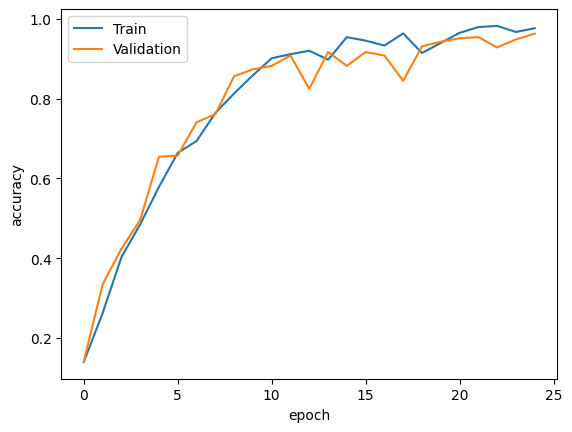

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

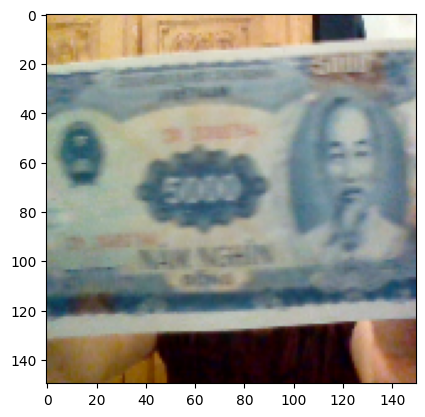

1/1 [==============================] - 1s 612ms/step
[[2.5990521e-30 6.8225953e-27 2.3747275e-09 1.5823578e-37 1.0000000e+00
  0.0000000e+00 6.1533368e-21]]
This picture is:  5000 [2.5990521e-30 6.8225953e-27 2.3747275e-09 1.5823578e-37 1.0000000e+00
 0.0000000e+00 6.1533368e-21]
1.0


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[100]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[100]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

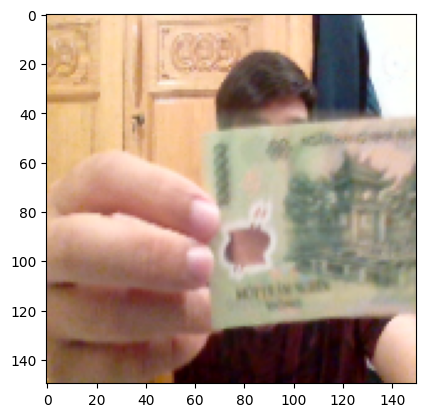

1/1 [==============================] - 0s 19ms/step
[[4.3524749e-05 9.9989915e-01 1.4602780e-10 2.9313311e-08 8.7961368e-08
  8.9410939e-13 5.7265701e-05]]
This picture is:  100000 [4.3524749e-05 9.9989915e-01 1.4602780e-10 2.9313311e-08 8.7961368e-08
 8.9410939e-13 5.7265701e-05]
0.99989915


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[297]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[297]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

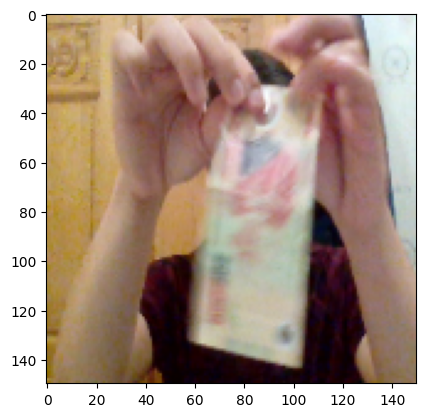

1/1 [==============================] - 0s 30ms/step
[[1.3927202e-04 7.7078852e-08 5.2642743e-13 9.9948335e-01 7.5493230e-11
  3.7717674e-04 8.6992677e-11]]
This picture is:  200000 [1.3927202e-04 7.7078852e-08 5.2642743e-13 9.9948335e-01 7.5493230e-11
 3.7717674e-04 8.6992677e-11]
0.99948335


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[249]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[249]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

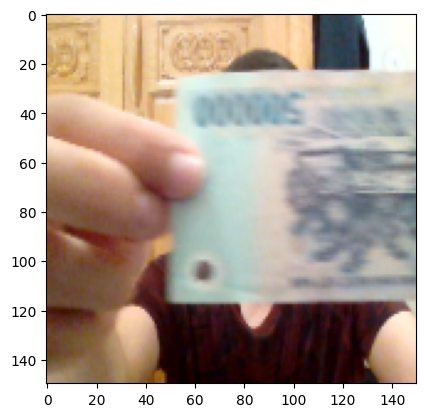

1/1 [==============================] - 0s 39ms/step
[[1.2352466e-07 2.4896732e-07 3.8254755e-03 3.4054633e-13 5.6925751e-07
  6.6189251e-18 9.9617356e-01]]
This picture is:  500000 [1.2352466e-07 2.4896732e-07 3.8254755e-03 3.4054633e-13 5.6925751e-07
 6.6189251e-18 9.9617356e-01]
0.99617356


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[97]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[97]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))